In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Deposition Data

In [2]:
path = '/Users/tiagopaiva/Desktop/autolab/'
files = os.listdir(path)
files_txt = [i for i in files if i.endswith('.txt')]
files_txt.sort()

data = [pd.read_csv( path + files_txt[i], delimiter = '\t') for i in range(len(files_txt))]


Text(0, 0.5, 'Potential (V)')

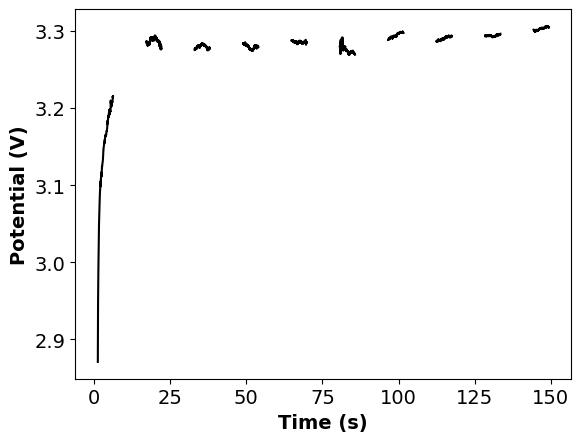

In [3]:
fig, ax = plt.subplots()

for n in range(len(files_txt)):
    ax.plot(data[n]['Time (s)'], data[n]['WE(1).Potential (V)'], color = 'black')

ax.set_xlabel('Time (s)',  weight = 'bold')
ax.set_ylabel('Potential (V)',  weight = 'bold')


# Galvanostactic Charge-Discharge

In [28]:
path = '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/AutoLabPGSTAT10/Data/T1_2_CVD/'

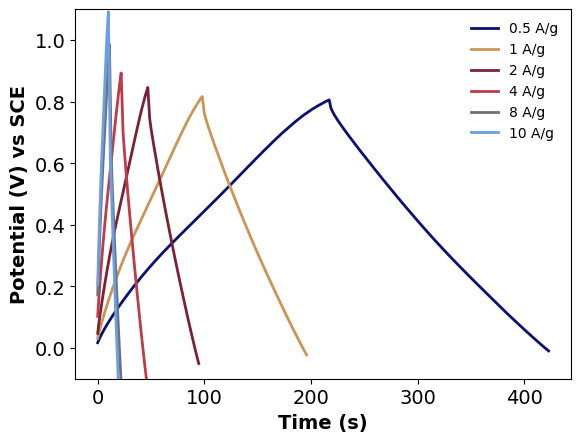

In [36]:

def ImportData(path):

# Import data and define outname

    files = os.listdir(path)

    files_txt = [i for i in files if i.endswith('.txt')]
    # files_txt.sort()
    files_txt = natsorted(files_txt)

    
    data = [pd.read_csv(path + dataset, delimiter = '\t', header = 0) for dataset in files_txt]

    # names = [name for name in data.columns]
    # out_name = re.split('|.', path)[-2]
    return data 

def PlotGCDcurve(dataset):

    df = [pd.concat([dataset[i], dataset[18 + i]]) for i in range(2, 18, 3)]
    df = [pd.concat([df[n]['Time (s)'] - df[n]['Time (s)'].iloc[0], df[n]['WE(1).Potential (V)']], axis = 1) for n in range(len(df))]
    # print(df[1])

    # Plot cosmetics 

    fig, ax = plt.subplots()
    colors = ['#0a1170','#cc9456','#7a2233','#be3b49', '#6c727a', '#6b9fe3']
    labels = ['0.5 A/g' , '1 A/g', '2 A/g', '4 A/g', '8 A/g' , '10 A/g' ]

    # actually plot

    for index, color in zip(range(len(df)), colors):
        ax.plot(df[index]['Time (s)'], df[index]['WE(1).Potential (V)'], color = color, linewidth = 2, marker = None)
        
    # Axis decoration

    ax.set_xlabel('Time (s)', weight = 'bold')
    ax.set_ylabel('Potential (V) vs SCE', weight = 'bold')
    ax.legend(labels, frameon = False)
    ax.set_ylim([-0.1, 1.1])

    return 

GCD_data = ImportData(path)
PlotGCDcurve(GCD_data)
